# Dimensionality Reduction
- Lot of features making training very slow
- Reducing dimensionality does cause information loss but can speed up training
    - Might make the system perform worse
    - In some cases, it can help filter out the noise and irrelevant details and thus result in higher performance.
- Dim reduction is useful for Data visualization. 

## Curse of Dimensionality
- Higher dimensional datasets are very sparse.  
- New instance will likely be far away from any training instance, thus leading to unreliable predictions than it would predict in lower dimensions.
- More the number of dimensions the training set has, the greater the risk of overfitting it.

## Approaches for dimensionality reduction

### Projection
- Many features in most real world datasets are constants, while other features are highly correlated. 
- As a result, all training instances lie within a much lower dimensional subspace of the high-dimensional space.
- Projection not the best approach always
    - Swiss roll dataset.
    - Can't directly project it onto a plane but can be done after unrolling the swiss roll.

In [9]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib import gridspec
import numpy as np

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

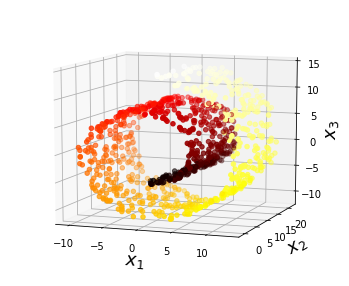

In [7]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

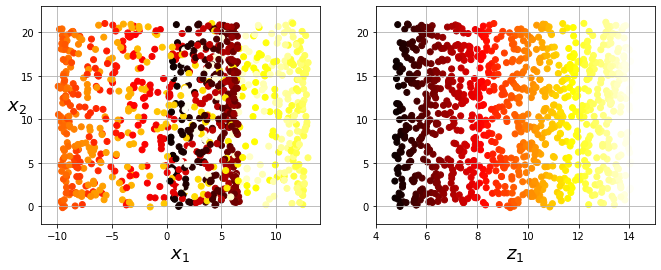

In [5]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, X[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

plt.show()

### Manifold Learning

- Swiss roll is an example of a 2D manifold.
- d-dimensional manifold is a part of an n-dimensional space (d<n) that locally resembles a d-dimensional hyperplane.
- Many dimensionality reduction algos model the manifold on which the training instances lie.

##### Manifold Hypothesis
- Most real-world high dimensional datasets lie close to a much lower-dimensional manifold.
- Implicit assumption:
    - Prediction will be easier if expressed in the lower-dimensional space of the manifold.
    - But not always the case. Can happen that it's easier to plot the decision boundary in a higher dimensional space in comparison to a lower dimensional space.

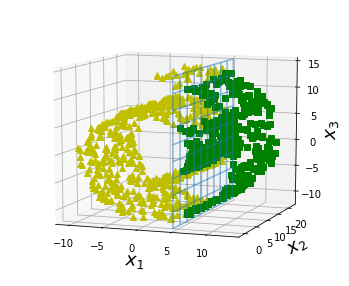

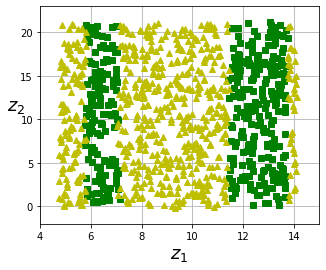

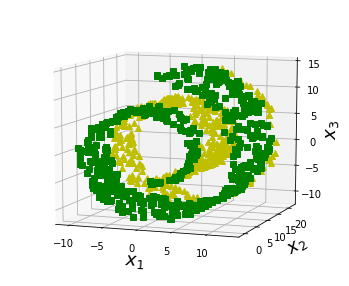

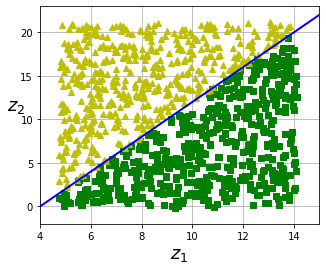

In [10]:
axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = X[:, 0] > 5
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > X[:, 1]
X_pos = X[positive_class]
X_neg = X[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], X[positive_class, 1], "gs")
plt.plot(t[~positive_class], X[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.show()

## Principal Component Analysis
- Identifies the hyperplane that lies closest to the data and then it projects the data onto it.

### Preserving the Variance
- While projecting to a lower dimensional hyperplane, we need to keep in mind that:
    - Select axis in such a way that it preserves the max amount of variance, as it is least probable to lose info.
    - Axis should minimize the mean squared distance b/w original dataset and it's projection on the axis

### Principal Components
- PCA identifies the axis that accounts for the most amt of variance in training set.
- All principal components(the axis on which the PC lies to be precise) are orthogonal to each other.
- NOTE: Since 2 unit vectors can lie on an axis, direction of these vectors as calculated by PCA is not stable. 
- Use Singular Value Decomposition to get the principal components.
    - SVD decomposes training set X into 3 matrices. $$ X = U * \sum * V^{T}$$
- PCA assumes that the data is centered around the origin.

### Projecting down to D dimensions
- 